In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
models=['LinearRegression',
          'Lasso',
          'Ridge',
          'ElasticNet',
          'KNN',
          'XGBoost',
          'RandomForest',
          'NeuralNetwork']

CV_results = {}
print('Attempting to load CV Results...')
for model in models:
    print('Reading {} CV Results...'.format(model))
    CVResults_df = pd.read_csv(str('output/'+model+'CVResults.csv'),index_col='Unnamed: 0')
    preds_df = pd.read_csv(str('output/'+model+'Predictions.csv'),index_col='id')
    CV_results[model] = [CVResults_df.loc['rmse','mean'], CVResults_df.loc['R2','mean'], 
                         CVResults_df.loc['expl_var','mean'],CVResults_df.loc['mae','mean'],CVResults_df.loc['mse','mean']]

Attempting to load CV Results...
Reading LinearRegression CV Results...
Reading Lasso CV Results...
Reading Ridge CV Results...
Reading ElasticNet CV Results...
Reading KNN CV Results...
Reading XGBoost CV Results...
Reading RandomForest CV Results...
Reading NeuralNetwork CV Results...


In [3]:
cv_df = pd.DataFrame(CV_results).T
cv_df.columns = ['rmse','R2','expl_var','mae','mse']
cv_df

,rmse,R2,expl_var,mae,mse
ElasticNet,0.482663,0.159656,0.175842,0.391785,0.233044
KNN,0.508978,0.091363,0.091590,0.415087,0.259066
Lasso,0.482683,0.159587,0.175791,0.391809,0.233063
LinearRegression,0.481358,0.187305,0.187359,0.390637,0.231714
NeuralNetwork,0.508976,0.091378,0.101081,0.418897,0.259072
RandomForest,0.457116,0.267053,0.267224,0.367923,0.208963
Ridge,0.482437,0.160447,0.176222,0.391521,0.232824
XGBoost,0.460132,0.236448,0.243007,0.370965,0.211814


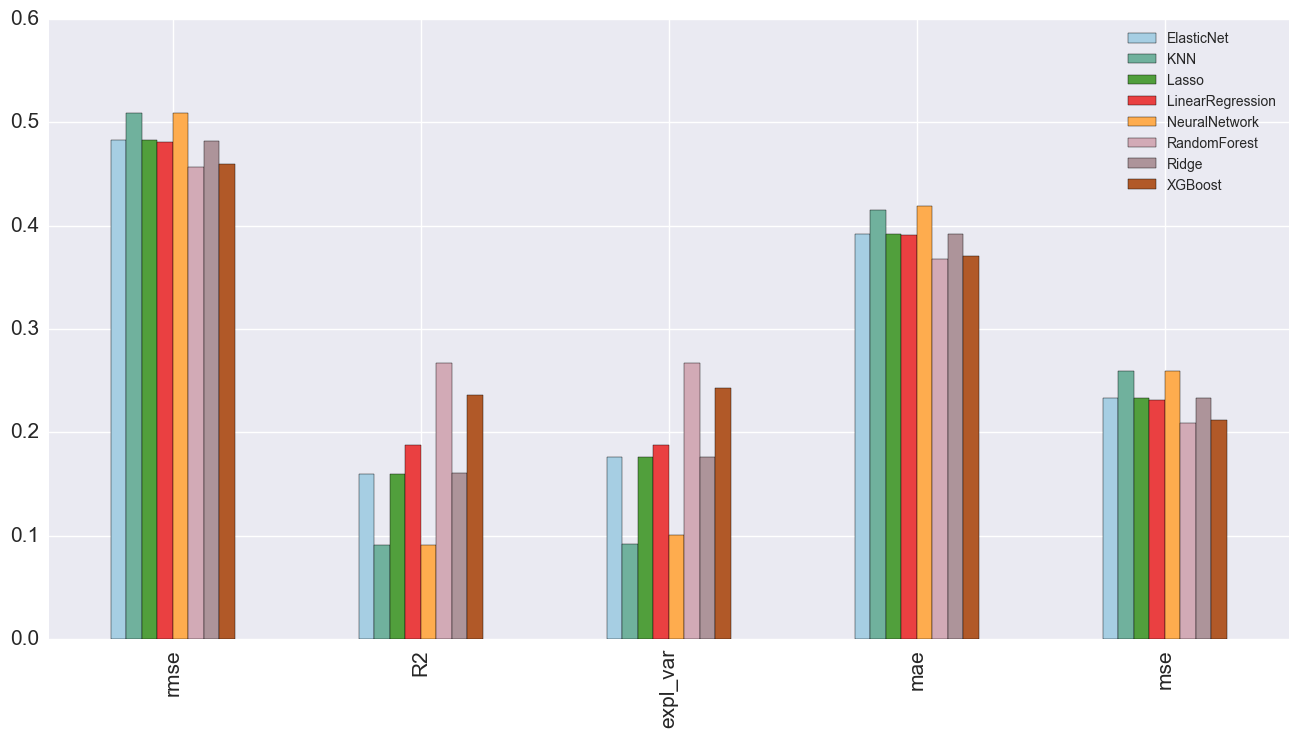

In [4]:
ax = cv_df.T.plot(kind='bar',figsize=(16, 8), legend=True, fontsize=15, colormap='Paired')
plt.show()
fig = ax.get_figure()
fig.savefig('output/models_vs_evals.png')